# Zoo: Web01-03 Experiment Data

In [1]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set_style("ticks")

CONF_ID = "param__header__all__config_id"

df01 = pd.read_csv("csv_experiments_WEB1.csv")
df02 = pd.read_csv("csv_experiments_WEB2.csv")
df03 = pd.read_csv("csv_experiments_WEB3.csv")

# do renaming and selection
mapping01 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-nginx.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-nginx.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}

mapping02 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-haproxy.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-haproxy.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}

mapping03 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.px-squid.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.px-squid.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}

df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
df03 = select_and_rename(df03, mapping03)
df01["vnf"] = "nginx"
df02["vnf"] = "haproxy"
df03["vnf"] = "squid"

#df02["ids"] = "snort2"

df_list = [df01, df02, df03]
    
# clear the data
for df in df_list:
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k http://20.0.0.254:8888/bunny.mp4", "big")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i -X 20.0.0.254:3128 http://40.0.0.254:80/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k -X 20.0.0.254:3128 http://40.0.0.254:80/bunny.mp4", "big")
    print(df.head())
    print("---")
    
df_combined = pd.concat(df_list)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


                                                size  cpu_bw  mem  \
0  ab -c 1 -t 60 -n 99999999 -e /tngbench_share/a...     0.1   64   
1  ab -c 1 -t 60 -n 99999999 -e /tngbench_share/a...     0.1   64   
2  ab -c 1 -t 60 -n 99999999 -e /tngbench_share/a...     0.1   64   
3  ab -c 1 -t 60 -n 99999999 -e /tngbench_share/a...     0.1   64   
4  ab -c 1 -t 60 -n 99999999 -e /tngbench_share/a...     0.1   64   

   requests_per_second  completed_requests  failed_requests  \
0              1733.25            104196.0              0.0   
1              1747.06            105190.0              0.0   
2              1710.96            103188.0              0.0   
3              1717.78            103718.0              0.0   
4              1656.68            100496.0              0.0   

   html_transfer_byte  mean_time_per_request  total_transfer_byte  \
0                 0.0                  0.577           31838613.0   
1                 0.0                  0.572           32142337.0   

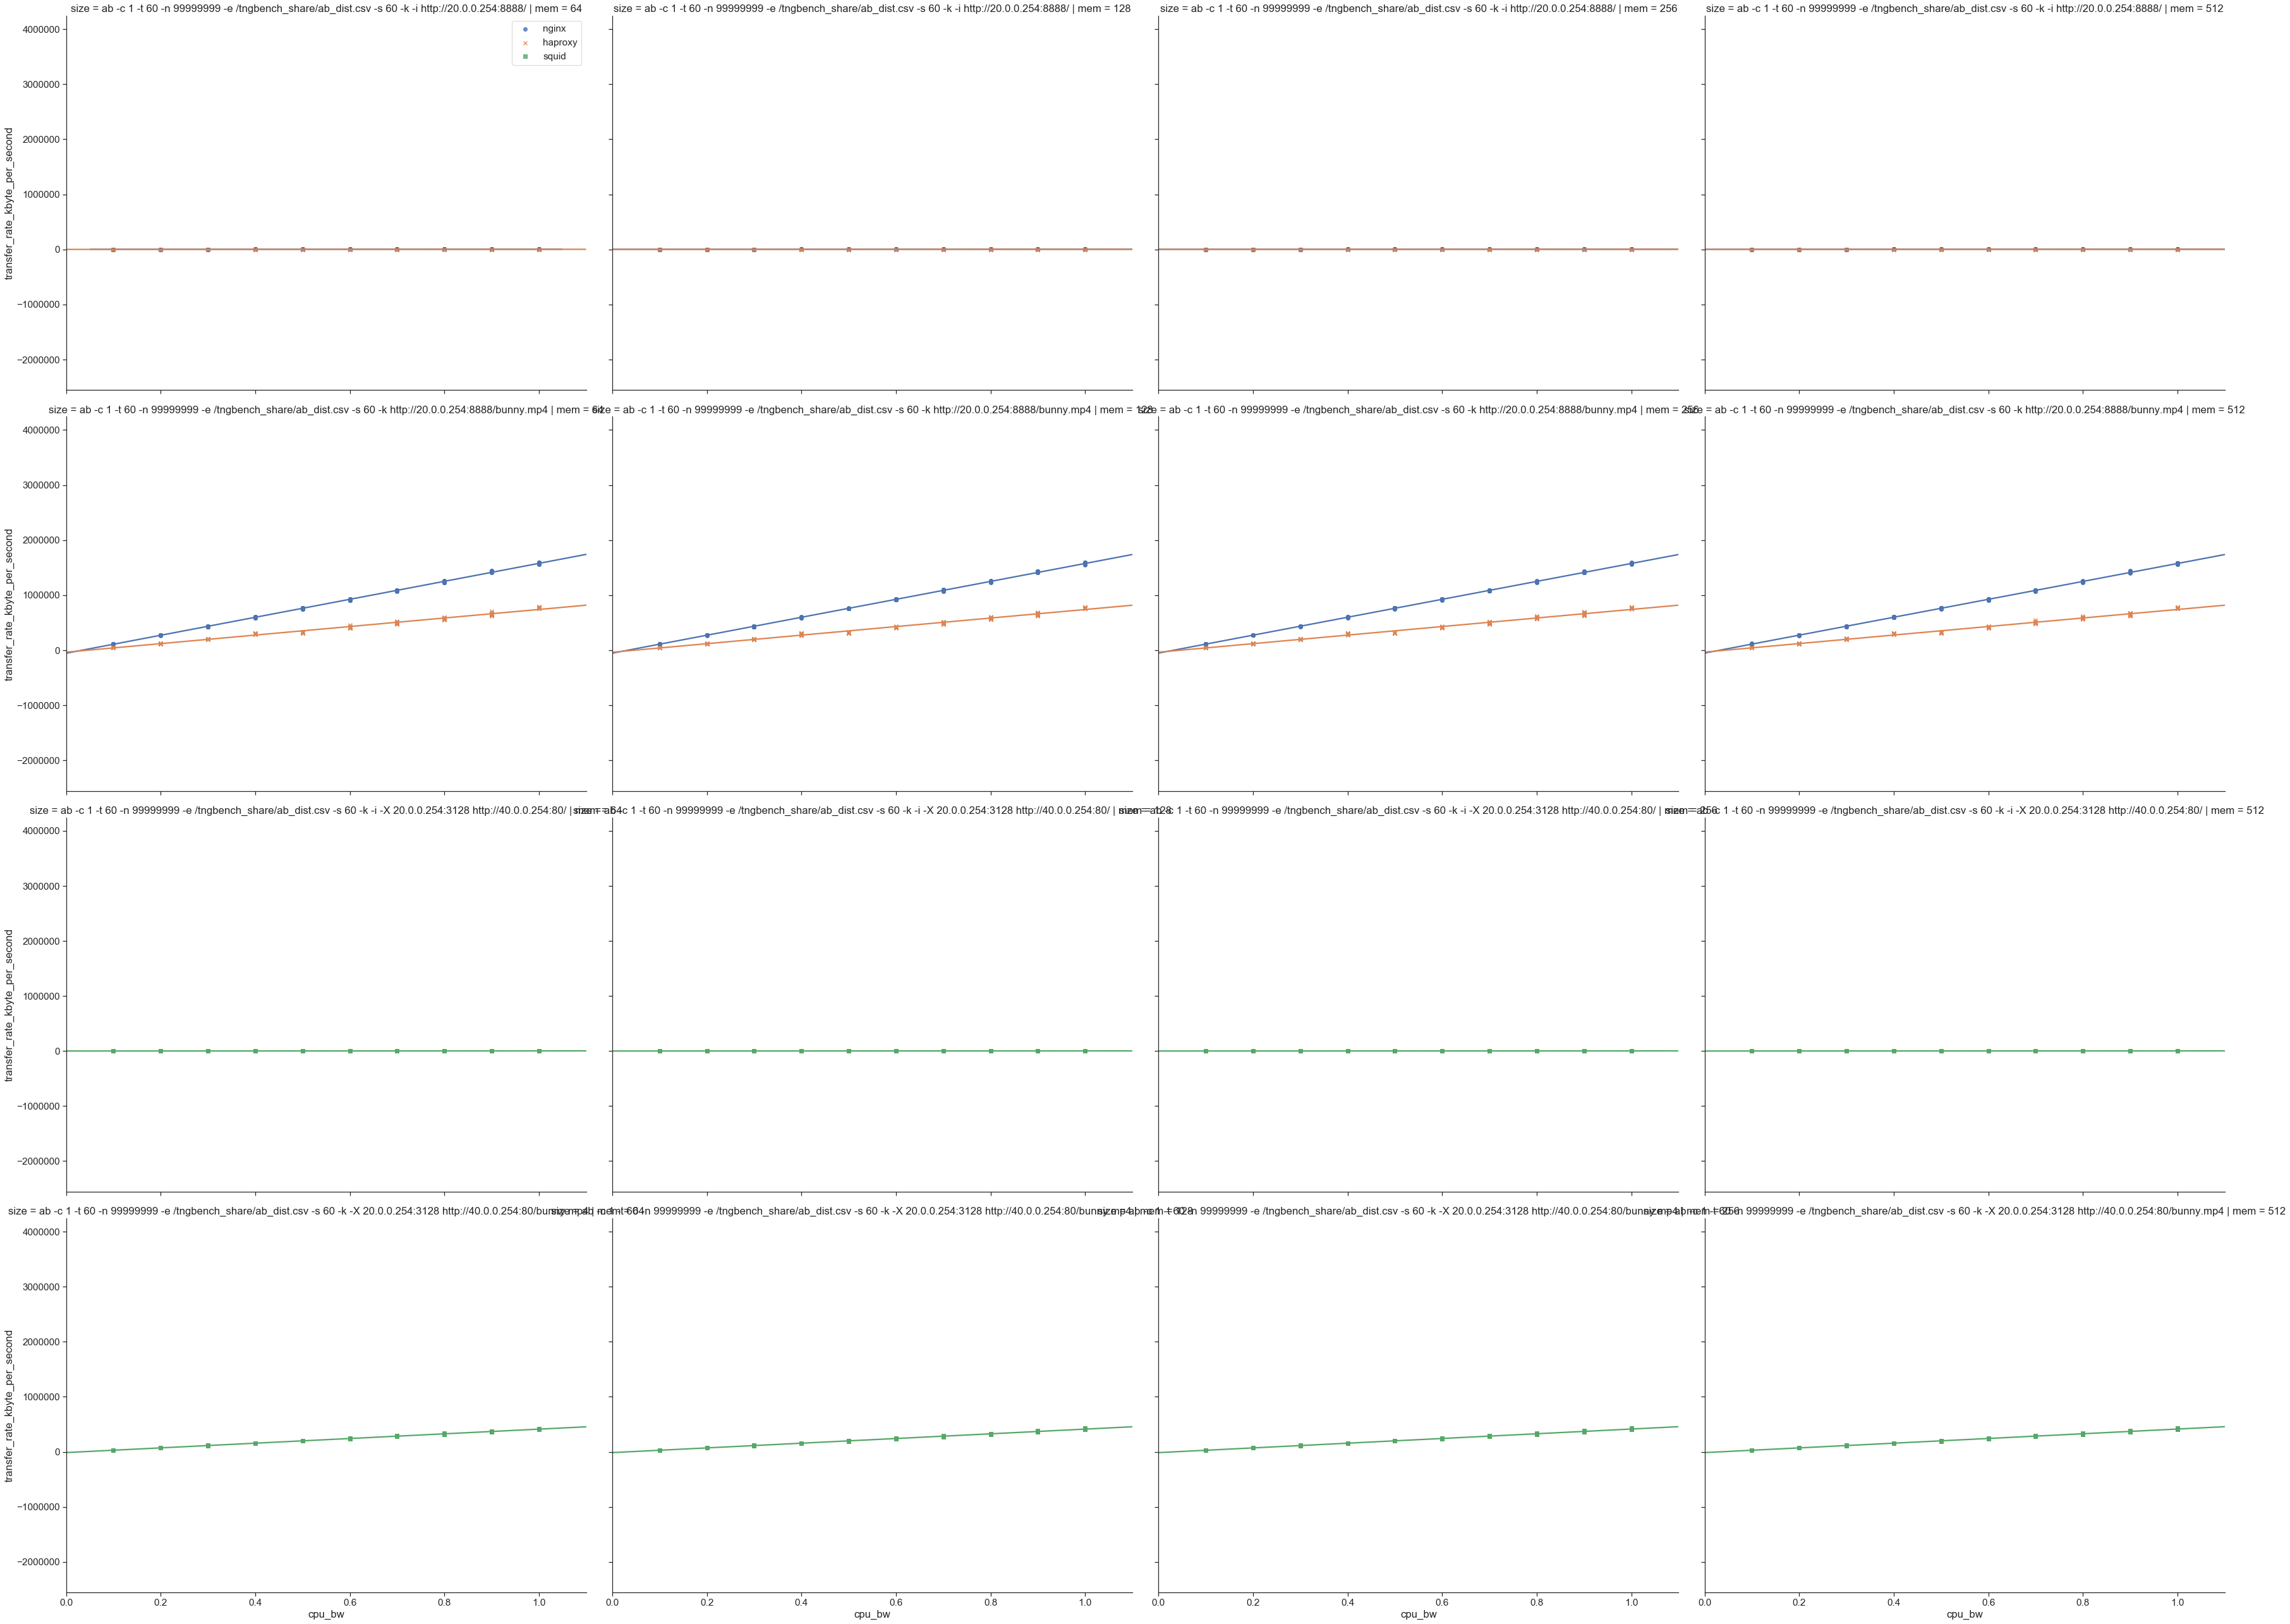

In [5]:
dff = df_combined.copy()
#dff = dff.loc[dff[x_col] >= .5]
sns.set(font_scale=1.4, style="ticks")

for i, m in enumerate(["transfer_rate_kbyte_per_second"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", row="size", data=dff, height=3*3, aspect=1.4, markers=["o", "x", "s"], legend_out=False, order=1)# palette=dict(suricata="b", snort2="g"))
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    g.set(xlim=(0.0, 1.1))
    #if i == 0:
    #    g.set(xlim=(0.0, 1.1), ylim=(0, 70))
    #    g.set_axis_labels("CPU bandwidth (%)", "processed packets/s\n(x10k)")
    #    plt.savefig("plots/zoo_sec_packets.pdf", dpi=300)
    #    plt.savefig("plots/zoo_sec_packets.png", dpi=300)
    #else:
    #    g.set(xlim=(0.0, 1.1), ylim=(0, 50))
    #    g.set_axis_labels("CPU bandwidth (%)", "packet drops (%)")
    #    plt.savefig("plots/zoo_sec_drop.pdf", dpi=300)
    #    plt.savefig("plots/zoo_sec_drop.png", dpi=300)

In [7]:
dff = df_combined.copy()
#dff = dff.loc[dff[x_col] >= .5]
dff = dff.loc[dff["size"] == "small"]
dff = dff.loc[dff["mem"] < 129]
dff["total_transfer_byte"] /= (1024 * 1024)  # MByte
sns.set(font_scale=1.4, style="ticks")

# ["requests_per_second", "completed_requests", "failed_requests", "html_transfer_byte", "mean_time_per_request", "total_transfer_byte", "transfer_rate_kbyte_per_second"]
for i, m in enumerate(["requests_per_second", "mean_time_per_request", "total_transfer_byte"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", data=dff, height=3.4, aspect=1.4, markers=['o', 'x', 's'], legend_out=False, order=3, truncate=False, x_jitter=.0, line_kws={"linewidth": .9})# palette=dict(suricata="b", snort2="g"))
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    
    if i == 0:
        g.set(xlim=(0.0, 1.1), ylim=(0, 10000))
        g.set_axis_labels("CPU bandwidth (%)", "requests/s")
        plt.savefig("plots/zoo_web_requests.pdf", dpi=300)
        plt.savefig("plots/zoo_web_requests.png", dpi=300)
    if i == 1:
        g.set(xlim=(0.0, 1.1), ylim=(0, 1))
        g.set_axis_labels("CPU bandwidth (%)", "request times (ms)")
        plt.savefig("plots/zoo_web_reqtime.pdf", dpi=300)
        plt.savefig("plots/zoo_web_reqtime.png", dpi=300)
    if i == 2:
        g.set(xlim=(0.0, 1.1), ylim=(0, 300))
        g.set_axis_labels("CPU bandwidth (%)", "transfered bytes")
        plt.savefig("plots/zoo_web_transfer_byte.pdf", dpi=300)
        plt.savefig("plots/zoo_web_transfer_byte.png", dpi=300)

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

<Figure size 0x244.8 with 0 Axes>